In [17]:
##Importing necessary tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('S:/ML/datasets/loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Checking the dataset Information

In [19]:
df.shape

(614, 13)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [21]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [22]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [23]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [24]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [25]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [26]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [27]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [29]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [30]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

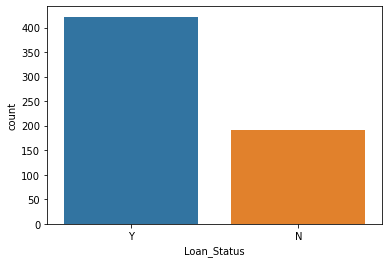

In [31]:
sns.countplot(x=df["Loan_Status"],data=df)

Data is imbalance.Have to balance it.

## EDA

### Checking Missing Values 

In [32]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are many missing values in the data set.Lets Fill and drop all missing values.

In [33]:
df['Gender']=df['Gender'].fillna('Unknown')
df['Married']=df['Married'].fillna('NA')
df['Dependents']=df['Dependents'].fillna(0)
df['Self_Employed']=df['Self_Employed'].fillna('No')
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["LoanAmount"].mode()[0])
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In this way we replace all missing values and no missing values is remaining now.

### Checking Duplicate Values

In [34]:
df.duplicated().sum()

0

0 duplicate values found in dataset.

In [35]:
## Droping Loan ID Column as is of no use
df=df.drop(columns=['Loan_ID'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
## Converting Dependent Column into int
df["Dependents"]=df["Dependents"].replace("3+",3).astype(int)
df.dtypes

Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Using LabelEncoder to convert Categorical Data into Numerical Data

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[["Gender","Married","Self_Employed","Education","Property_Area","Loan_Status"]]=df[["Gender","Married","Self_Employed",
                                                       "Education","Property_Area","Loan_Status"]].apply(le.fit_transform)
df[["Gender","Married","Self_Employed","Education","Property_Area","Loan_Status"]]

,Gender,Married,Self_Employed,Education,Property_Area,Loan_Status
0,1,1,0,0,2,1
1,1,2,0,0,0,0
2,1,2,1,0,2,1
3,1,2,0,1,2,1
4,1,1,0,0,2,1
...,...,...,...,...,...,...
609,0,1,0,0,0,1
610,1,2,0,0,0,1
611,1,2,0,0,2,1
612,1,2,0,0,2,1


## Implementing Decision tree 

In [43]:
x=df.drop(columns='Loan_Status')
y=df['Loan_Status']

### Oversampling for data balancing

In [58]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(random_state=42)
x1,y1=os.fit_resample(x,y)
x1.shape,y1.shape

((844, 11), (844,))

In [59]:
y1.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [60]:
## Splitting Data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
## Model Training
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [63]:
## Model Testing
ypred=model.predict(xtest)
ypred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

Accuracy is: 0.834319526627219
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        94
           1       0.86      0.75      0.80        75

    accuracy                           0.83       169
   macro avg       0.84      0.83      0.83       169
weighted avg       0.84      0.83      0.83       169



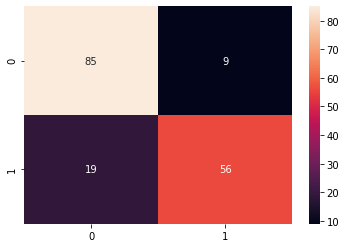

In [64]:
## Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

### Tuning Hyperameters  

In [73]:
#model
model=DecisionTreeClassifier()
#Parameters
criterion=['gini','entropy']
splitter=['best','random']
max_features=['auto','sqrt','log2']
max_depth=range(1,11)
#grid
grid=dict(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=max_depth)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=42)
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring='accuracy')
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'splitter': 'best'}
0.7679470295580918


### Retraining the model

In [78]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [79]:
## Model Training
model=DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto', splitter='best')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='auto')

In [80]:
## Model Testing
ypred=model.predict(xtest)
ypred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

Accuracy score: 0.8047337278106509
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        94
           1       0.76      0.83      0.79        75

    accuracy                           0.80       169
   macro avg       0.80      0.81      0.80       169
weighted avg       0.81      0.80      0.81       169



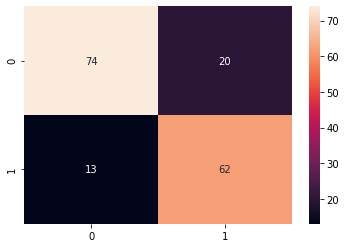

In [81]:
#Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy score:",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

##### Accuracy before Tuning 
Accuracy is: 0.834319526627219
              
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        94
           1       0.86      0.75      0.80        75

##### Accuracy After Tuning
Accuracy score: 0.8047337278106509
              
               precision    recall  f1-score   support

           0       0.85      0.79      0.82        94
           1       0.76      0.83      0.79        75



## StandardScaler

In [100]:
x=df.drop(columns='Loan_Status')
y=df['Loan_Status']

In [101]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_xtest=sc.fit_transform(xtest)

In [102]:
## Splitting 
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [103]:
## Model Training
model_sc=DecisionTreeClassifier()
model_sc.fit(sc_xtrain,ytrain)

DecisionTreeClassifier()

In [104]:
## Model Testing
ypred_sc=model_sc.predict(sc_xtest)

Accuracy: 0.7396449704142012
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        94
           1       0.68      0.77      0.72        75

    accuracy                           0.74       169
   macro avg       0.74      0.74      0.74       169
weighted avg       0.75      0.74      0.74       169



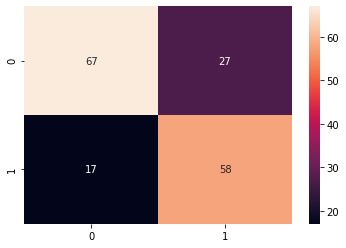

In [105]:
## Evaluation
cm=confusion_matrix(ytest,ypred_sc)
sns.heatmap(cm,annot=True)
print('Accuracy:',accuracy_score(ytest,ypred_sc))
print(classification_report(ytest,ypred_sc))

In [42]:
help(model)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ra

### Tuning

In [106]:
#model
model=DecisionTreeClassifier()
#Parameters
criterion=['gini','entropy']
splitter=['best','random']
max_features=['auto','sqrt','log2']
max_depth=range(1,11)
#grid
grid=dict(criterion=criterion,splitter=splitter,max_features=max_features,max_depth=max_depth)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=42)
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model,param_grid=grid,cv=cv,scoring='accuracy')
res=grid_cv.fit(sc_xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'splitter': 'best'}
0.7652692420251682


### Retraining model

In [107]:
## Model Training
model=DecisionTreeClassifier(criterion='entropy',max_depth=10, max_features='log2',splitter = 'best')
model.fit(sc_xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2')

In [108]:
## Model Testing
ypred=model.predict(sc_xtest)

Accuracy: 0.757396449704142
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        94
           1       0.69      0.81      0.75        75

    accuracy                           0.76       169
   macro avg       0.76      0.76      0.76       169
weighted avg       0.77      0.76      0.76       169



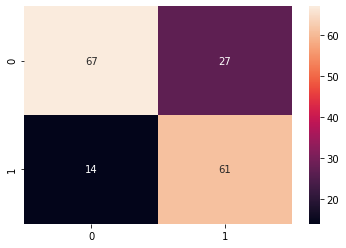

In [109]:
## Evaluation
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print('Accuracy:',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))